# MATH7002 Advanced Statistical methods
## Worksheet 5: Solutions

# Q1

In [1]:
turtles = read.csv("Turtles.csv")

In [2]:
x = turtles$Direction

In [3]:
negloglik2 = function(mu1,s1, mu2,s2, lambda)
  -sum(log(lambda*dnorm(x, mu1, s1) + (1-lambda)*dnorm(x,mu2,s2)))

In [4]:
require(stats4)
fit0 = mle(negloglik2, 
    start=list(mu1=min(x), s1=sd(x), mu2=max(x), s2=sd(x), lambda=0.5))

Loading required package: stats4

Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x,

In [5]:
summary(fit0)

Maximum likelihood estimation

Call:
mle(minuslogl = negloglik2, start = list(mu1 = min(x), s1 = sd(x), 
    mu2 = max(x), s2 = sd(x), lambda = 0.5))

Coefficients:
          Estimate  Std. Error
mu1     63.2215471  4.62824250
s1      29.8804037  3.81760767
mu2    238.4604365 18.24206978
s2      59.1779512 13.76002703
lambda   0.7428678  0.05725351

-2 log L: 837.1479 

# Q2

In [6]:
twoMix = function(x) {
  lambda = 0.5
  mu = range(x)
  sigma = rep(sd(x),2)
  repeat {
    curve(lambda*dnorm(x,mu[1], sigma[1]), 
          from=0, to=360, col="red")
    curve((1-lambda)*dnorm(x,mu[2], sigma[2]), 
          from=0, to=360, col="blue", add=TRUE)
    Sys.sleep(1)
    oldp = c(lambda, mu, sigma)
    gamma = lambda*dnorm(x, mu[1], sigma[1])
    gamma = gamma/(gamma+(1-lambda)*dnorm(x, mu[2], sigma[2]))
    mu[1] = sum(gamma*x)/sum(gamma)
    mu[2] = sum((1-gamma)*x)/sum(1-gamma)
    sigma[1] = sqrt(sum(gamma*(x-mu[1])^2)/sum(gamma))
    sigma[2] = sqrt(sum((1-gamma)*(x-mu[2])^2)/sum(1-gamma))
    lambda = sum(gamma)/length(x)
    del = sum(abs(c(lambda,mu,sigma)-oldp))
    if(del < 0.001) break
  }
  return(list(lambda=lambda, mu=mu, sigma=sigma))
}

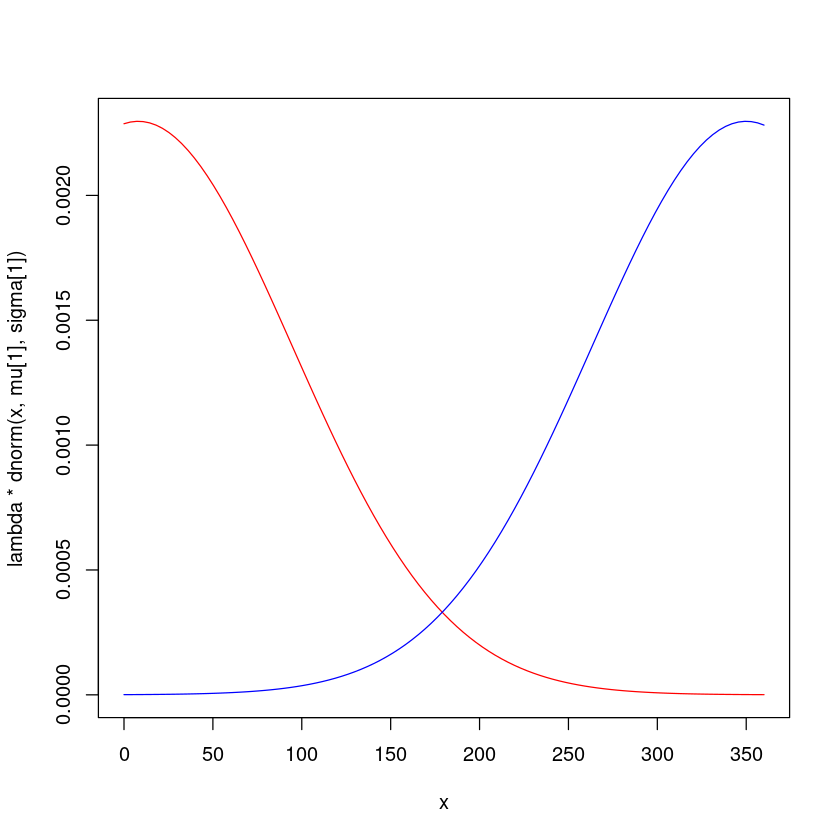

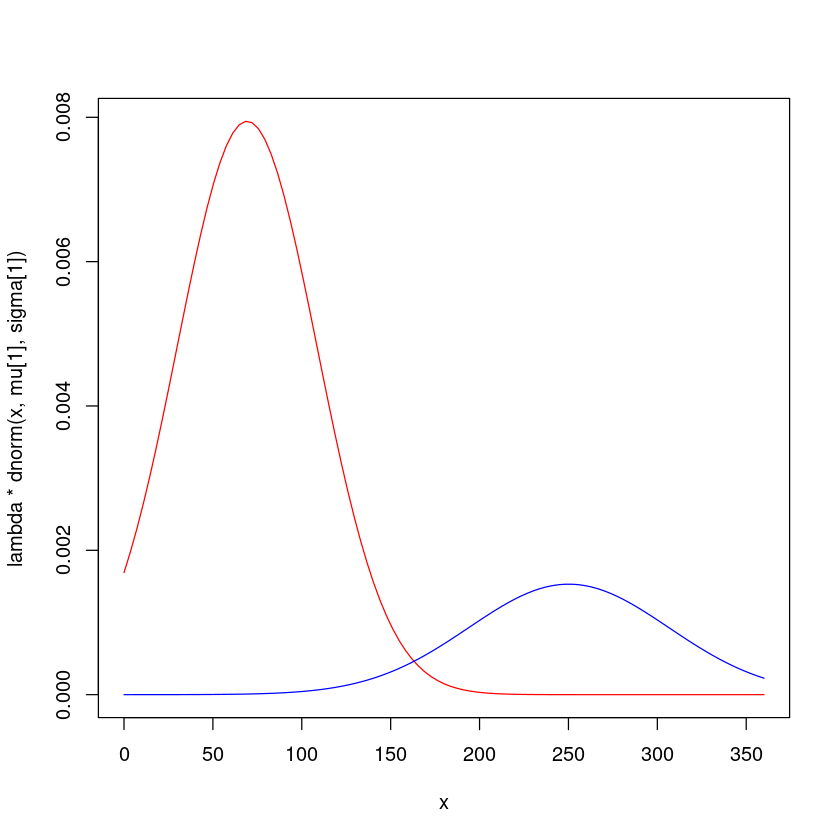

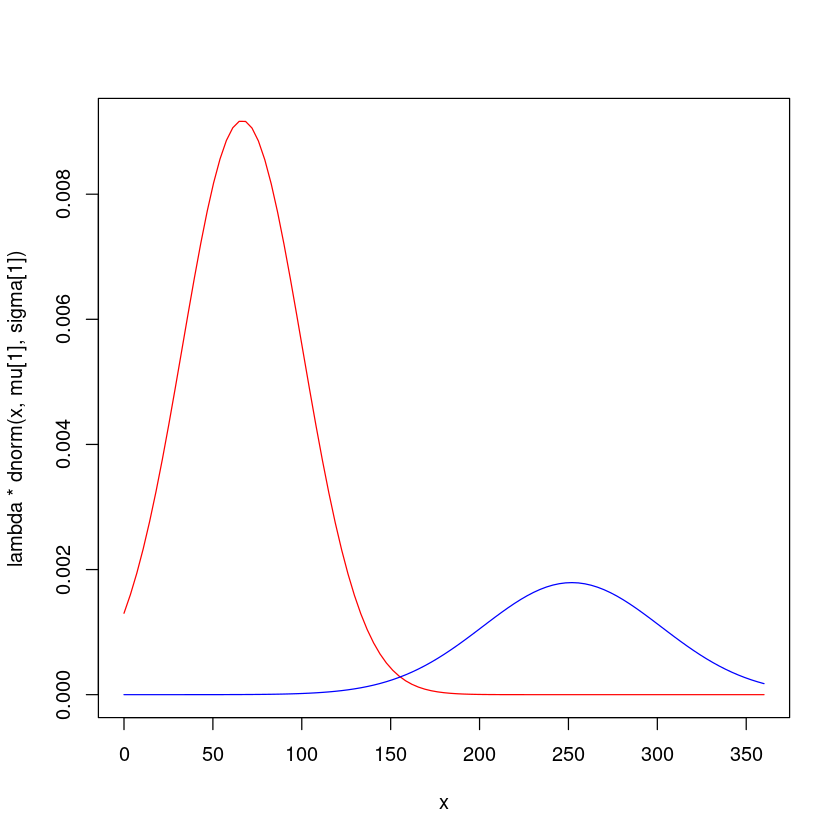

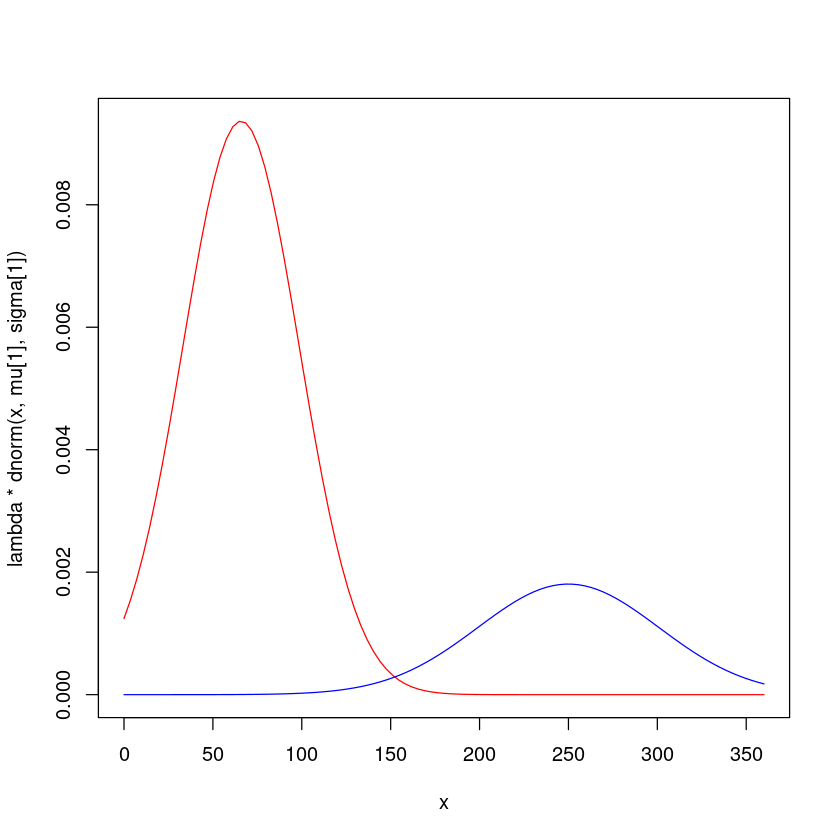

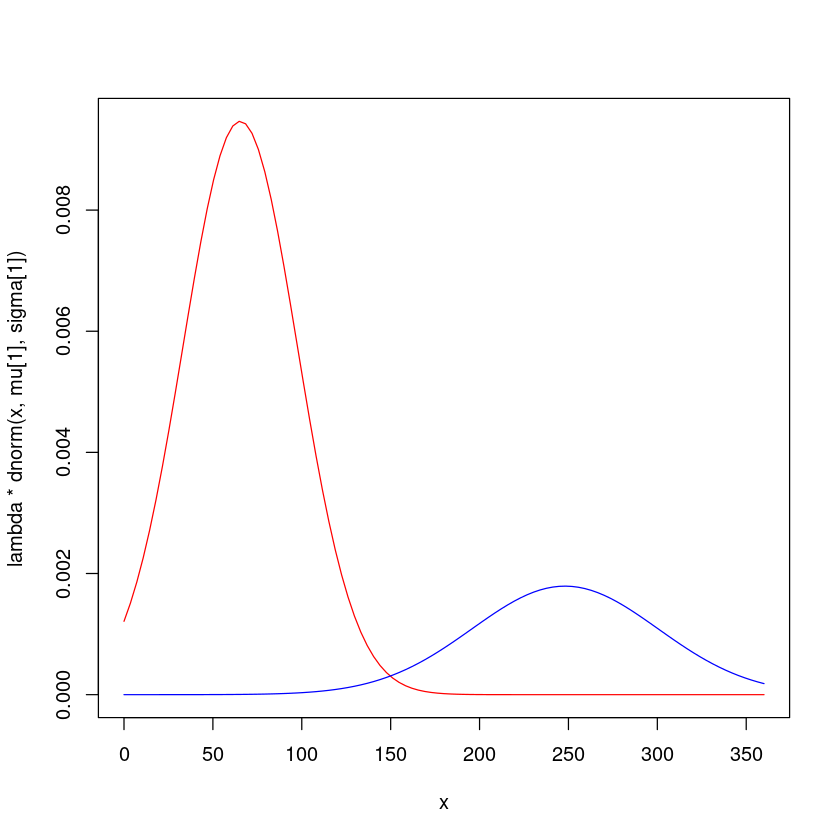

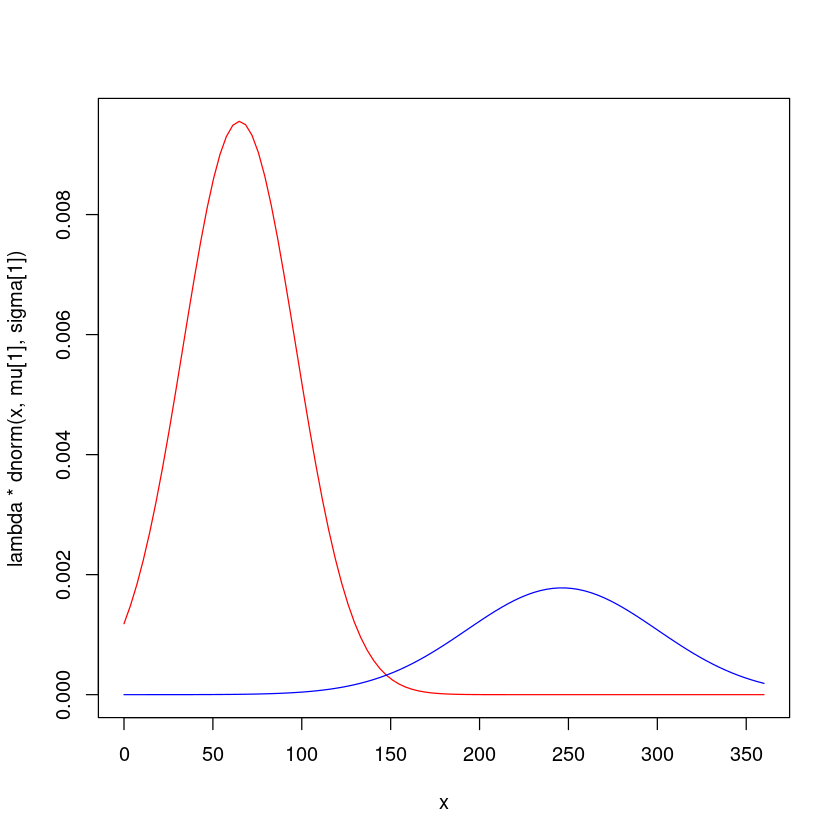

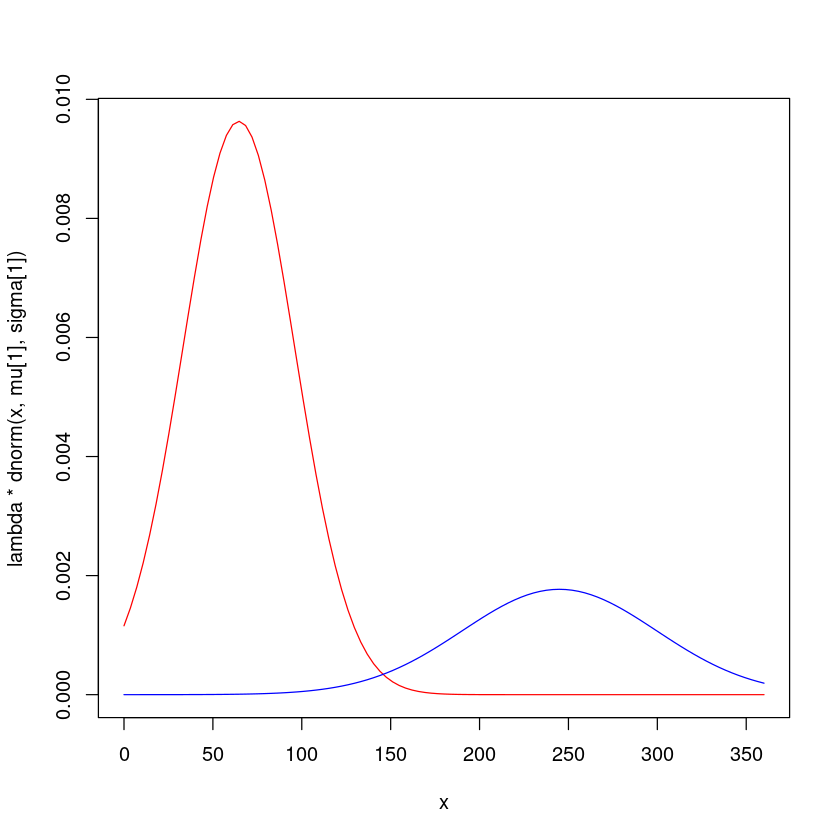

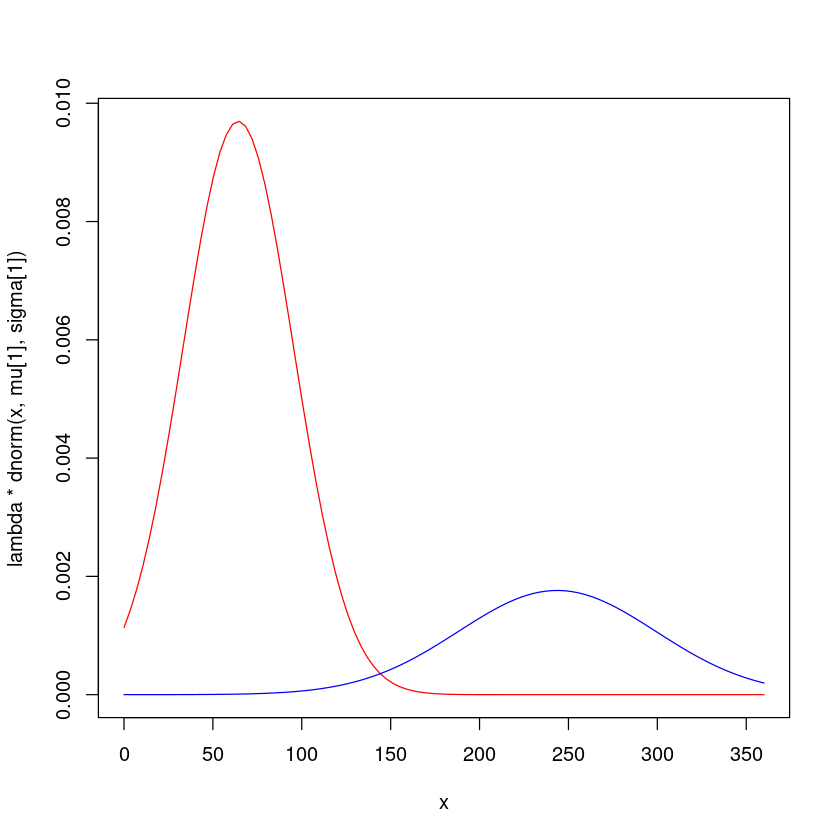

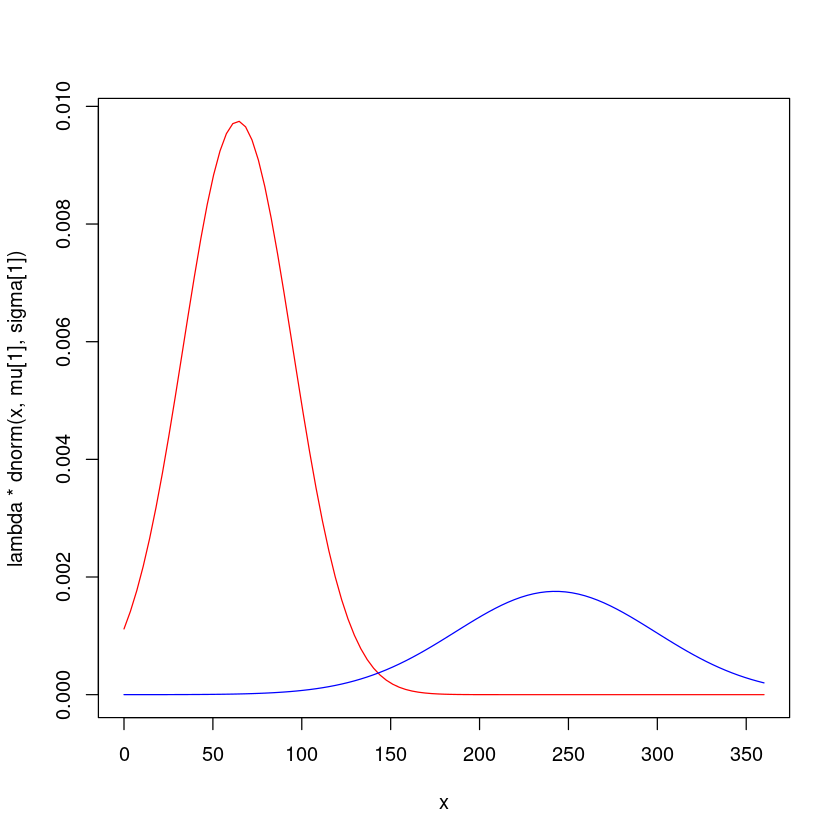

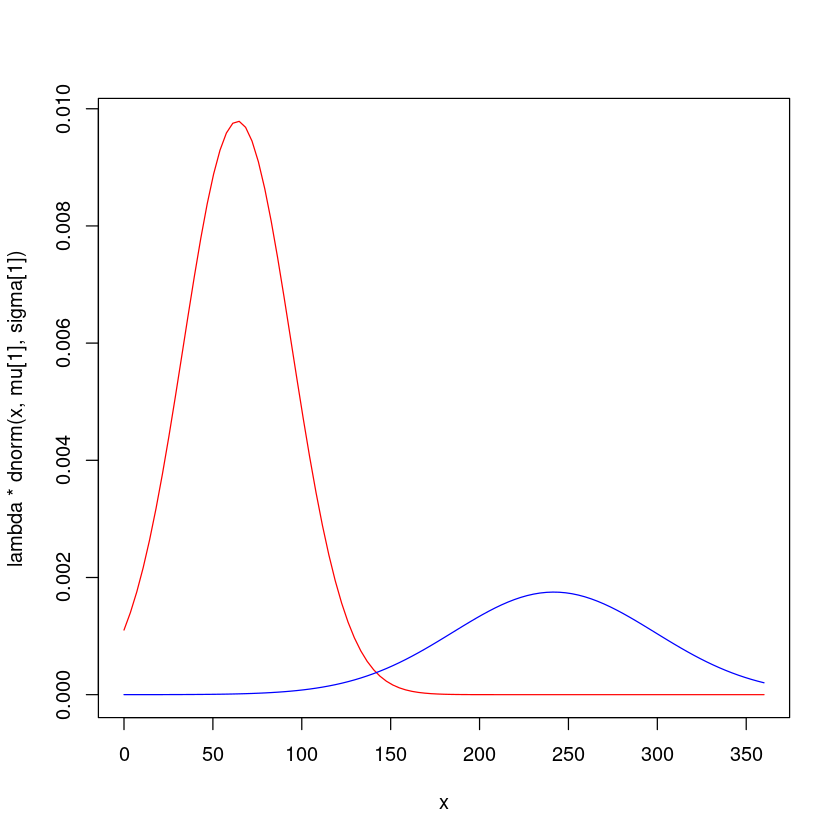

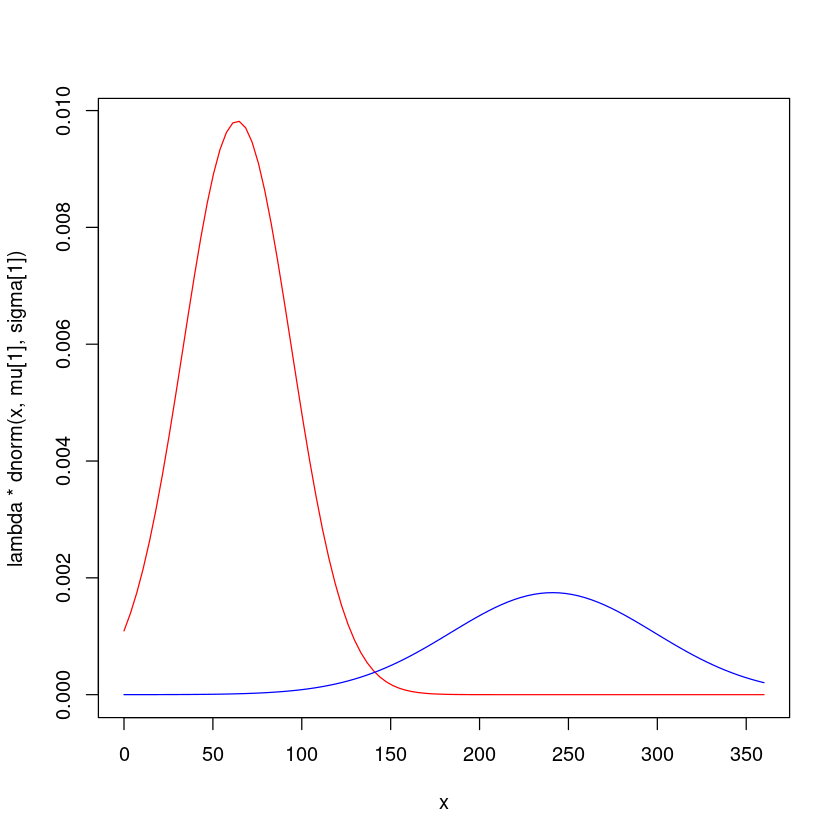

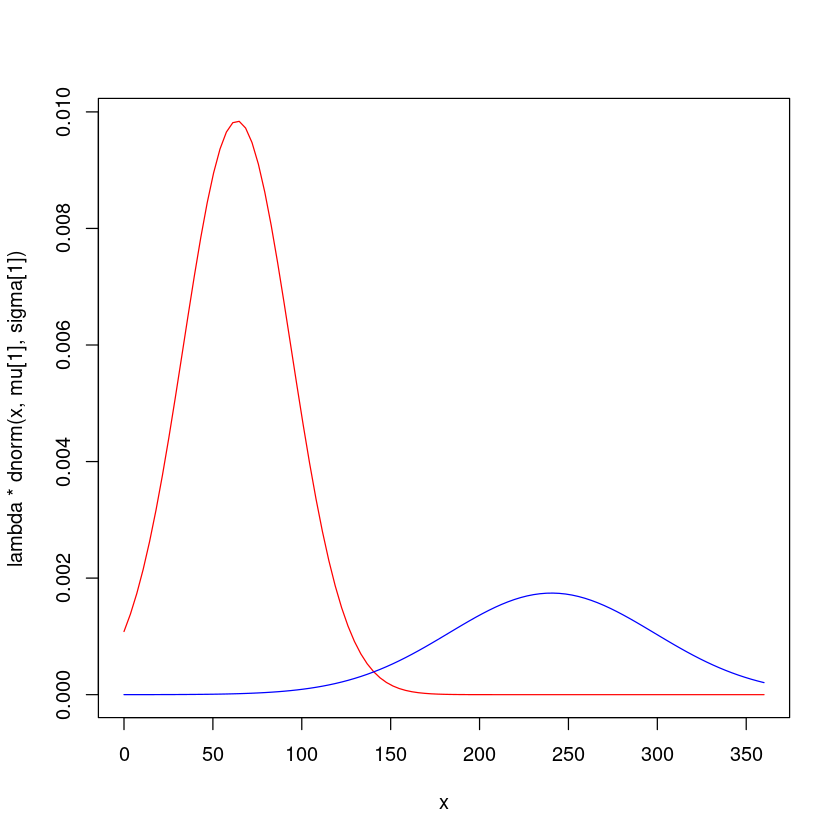

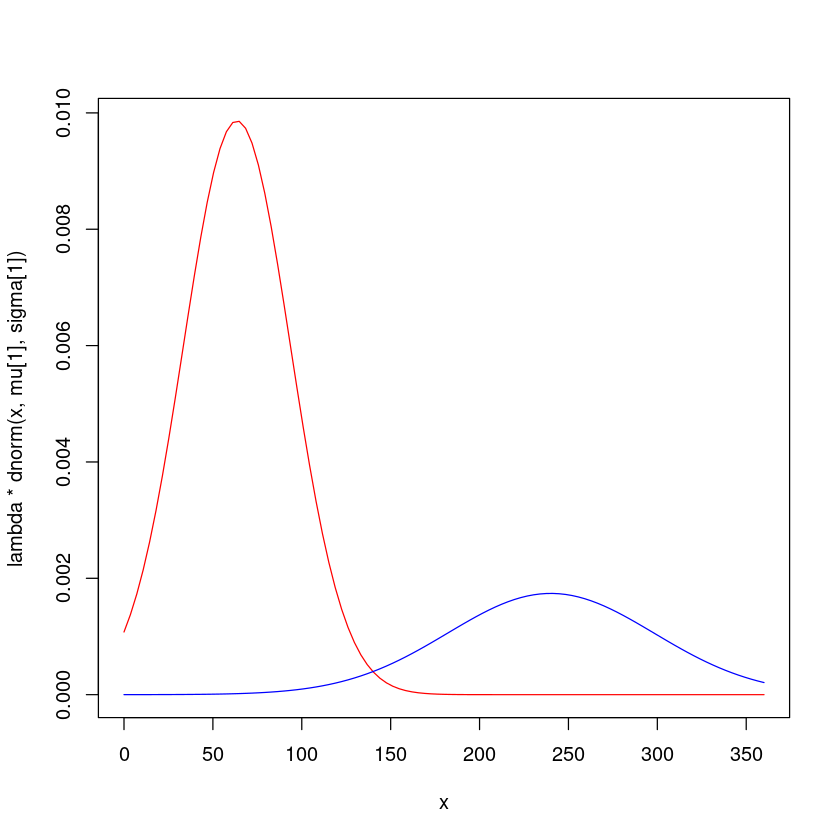

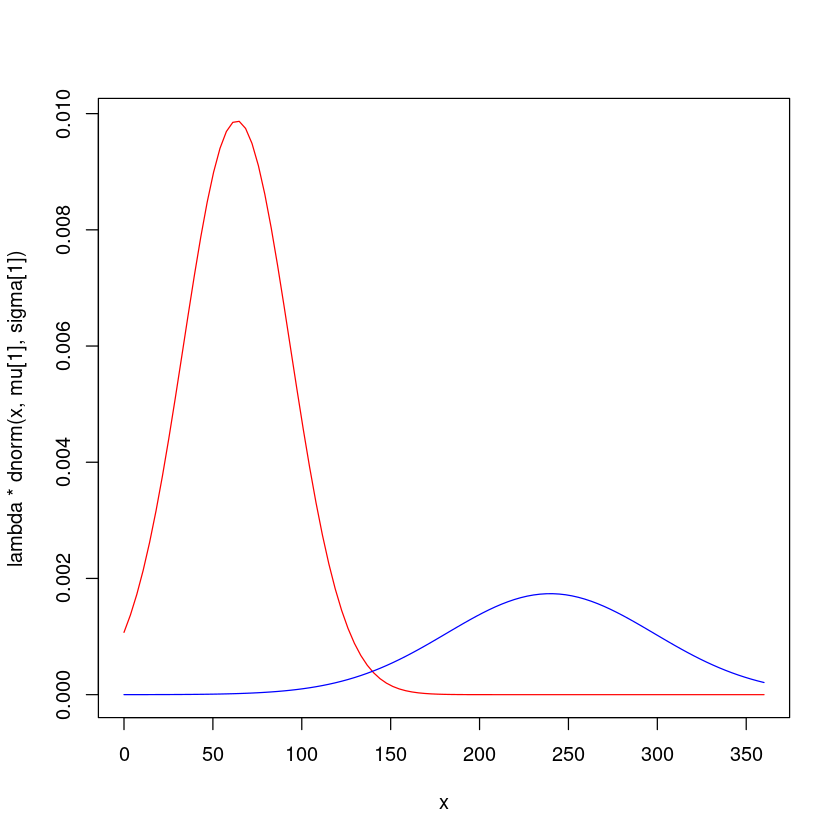

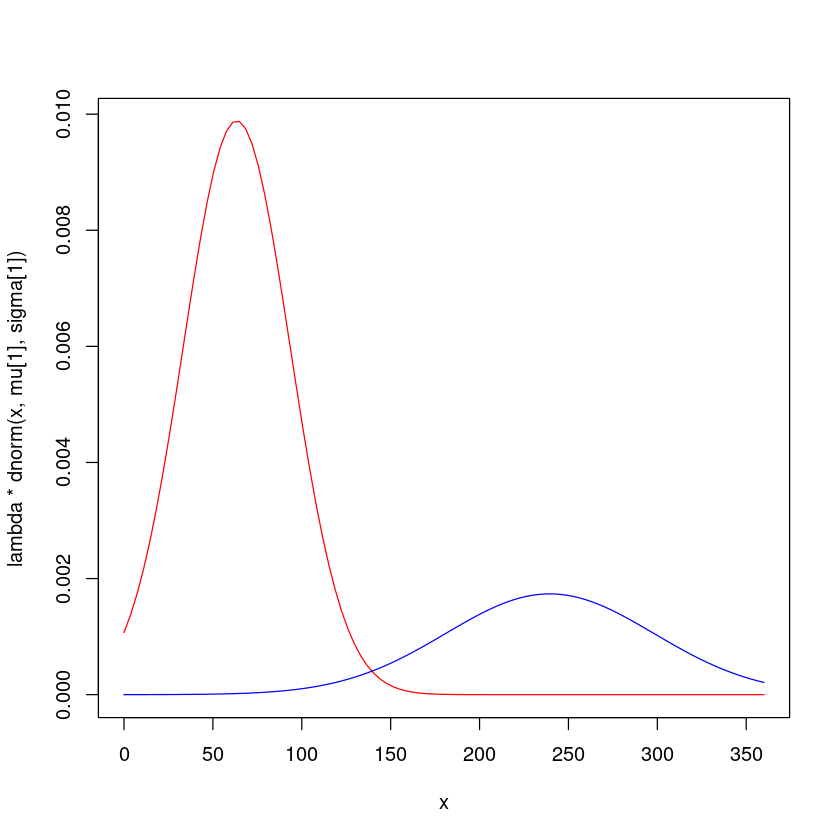

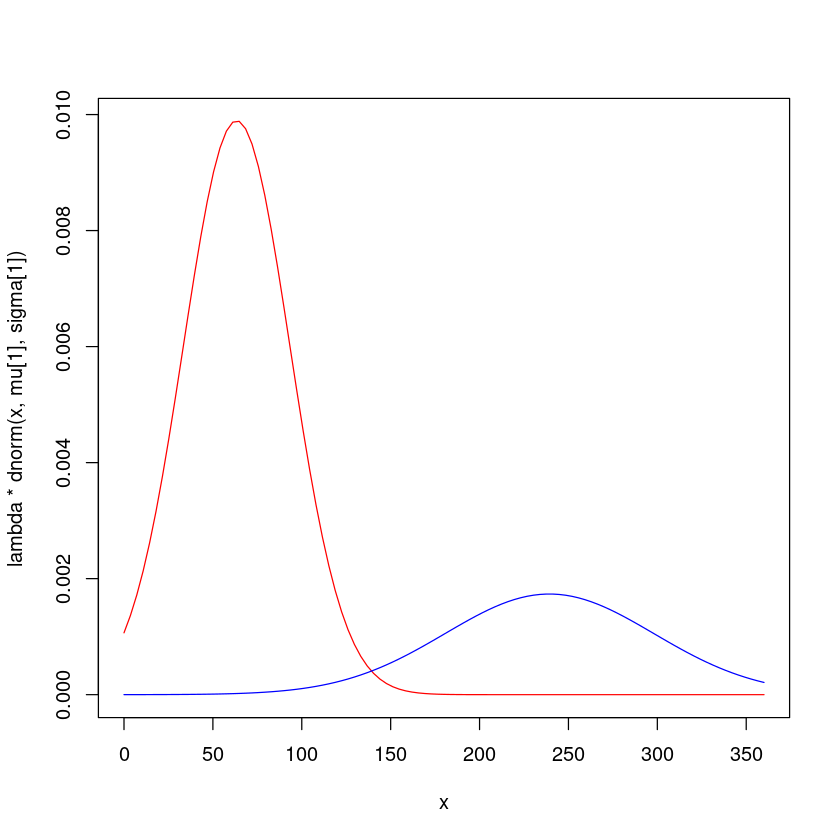

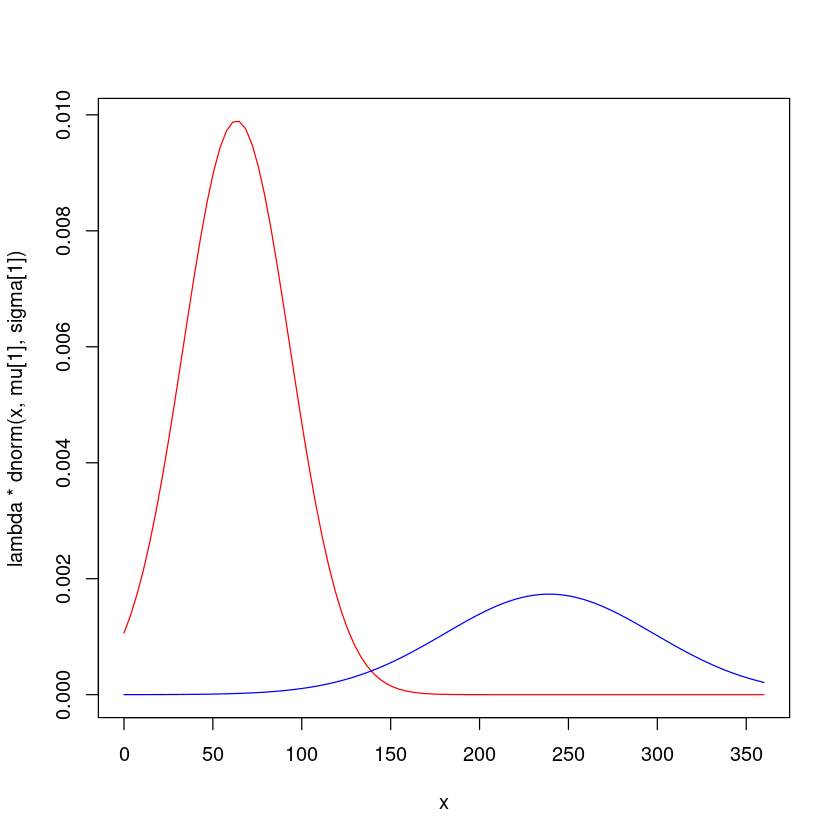

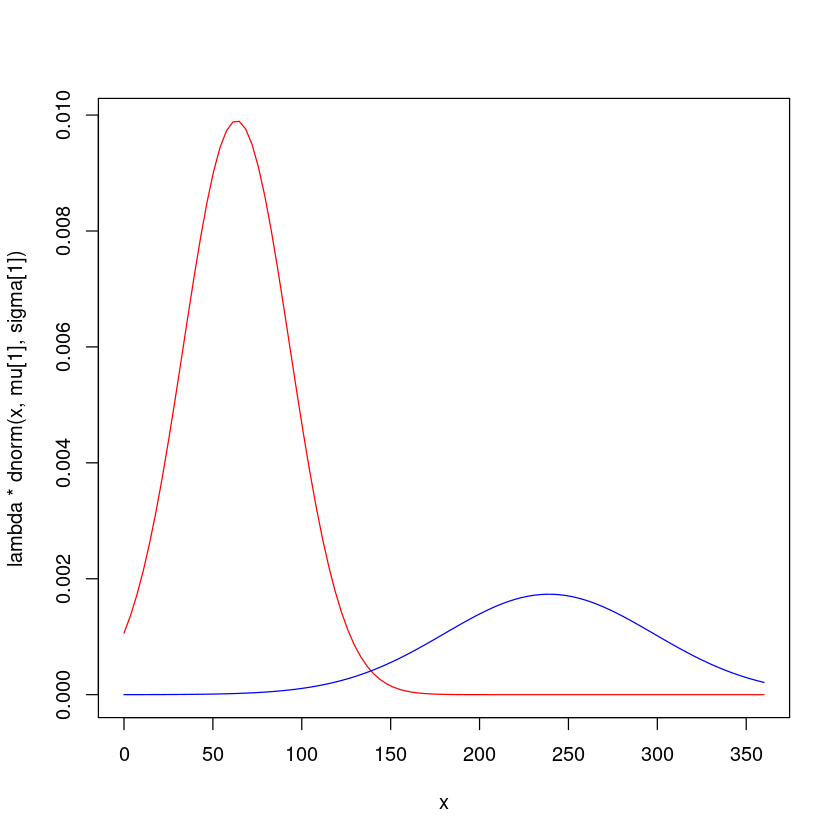

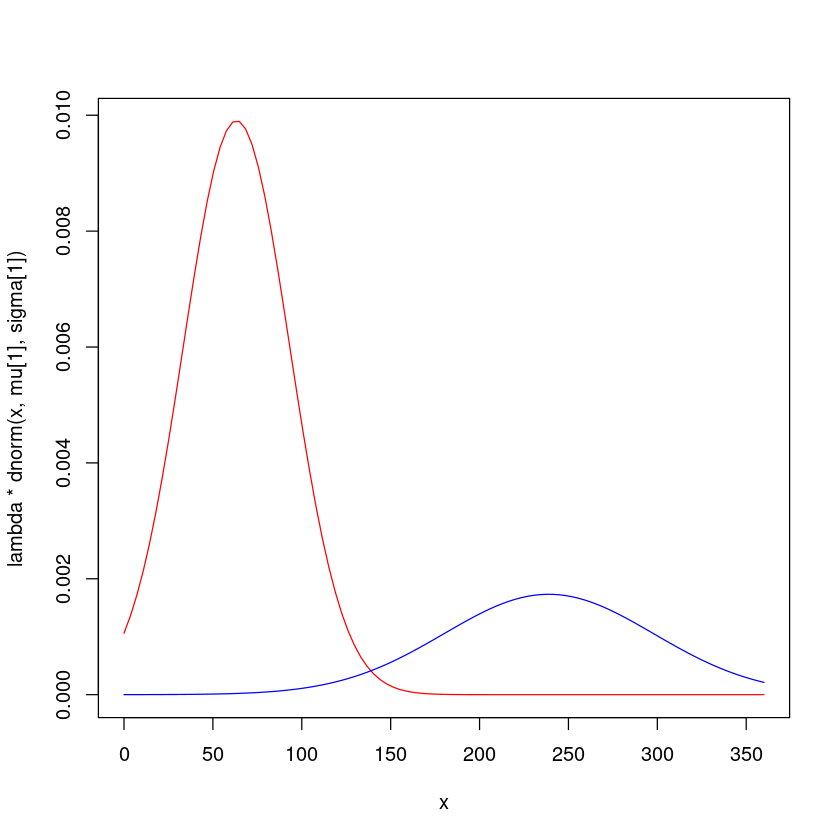

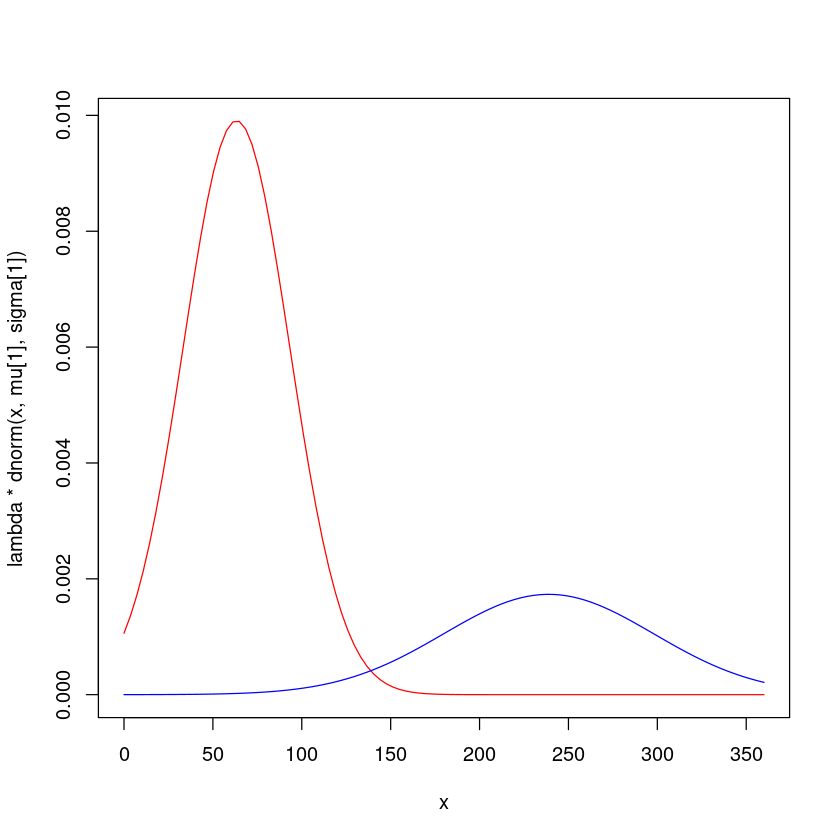

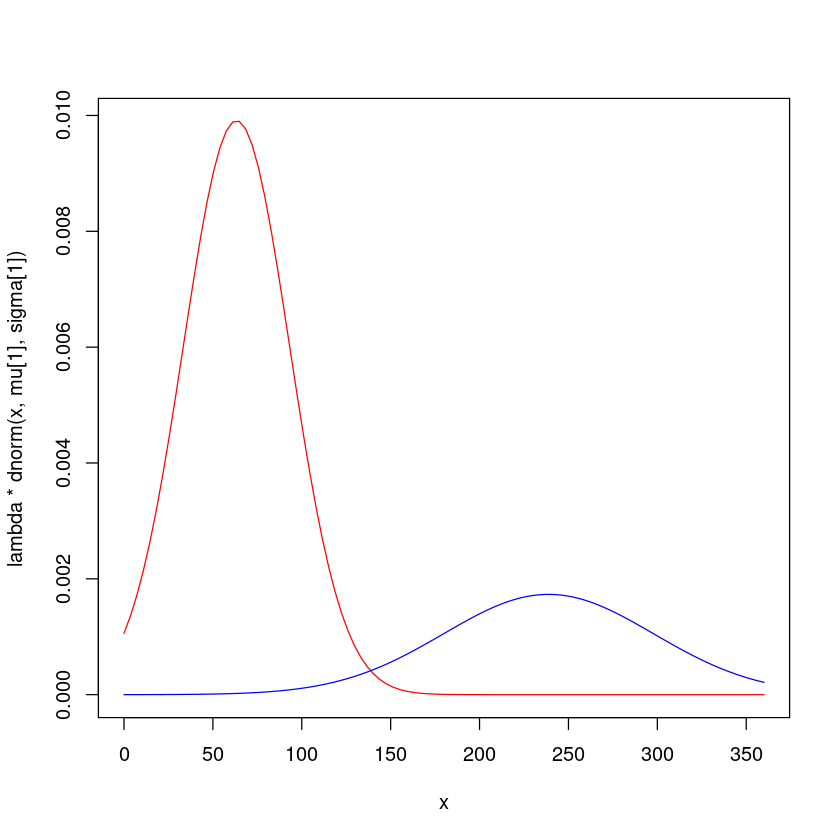

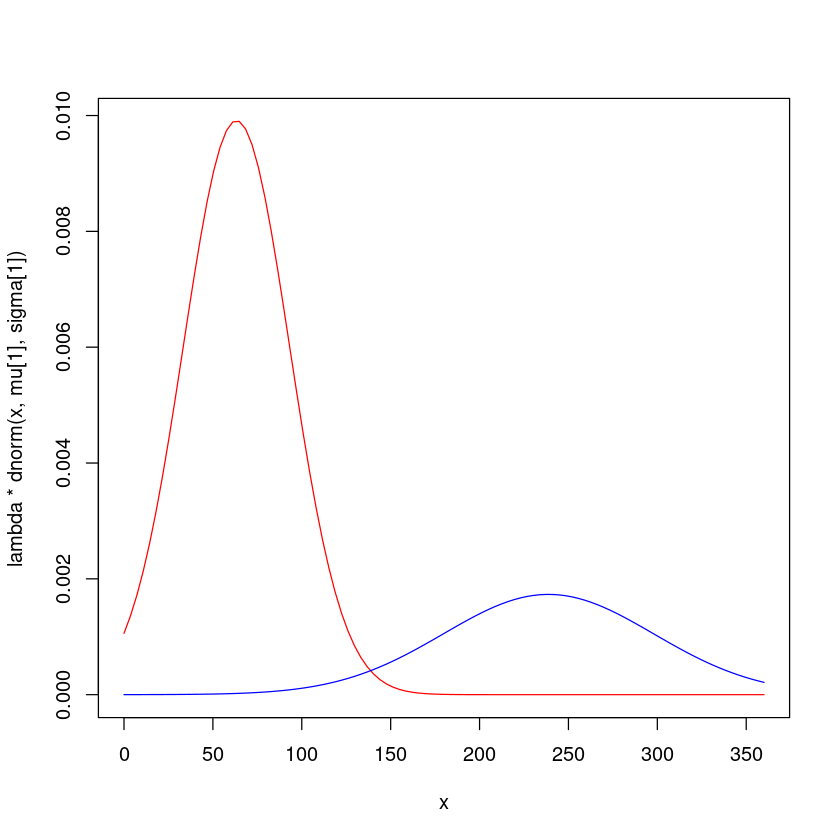

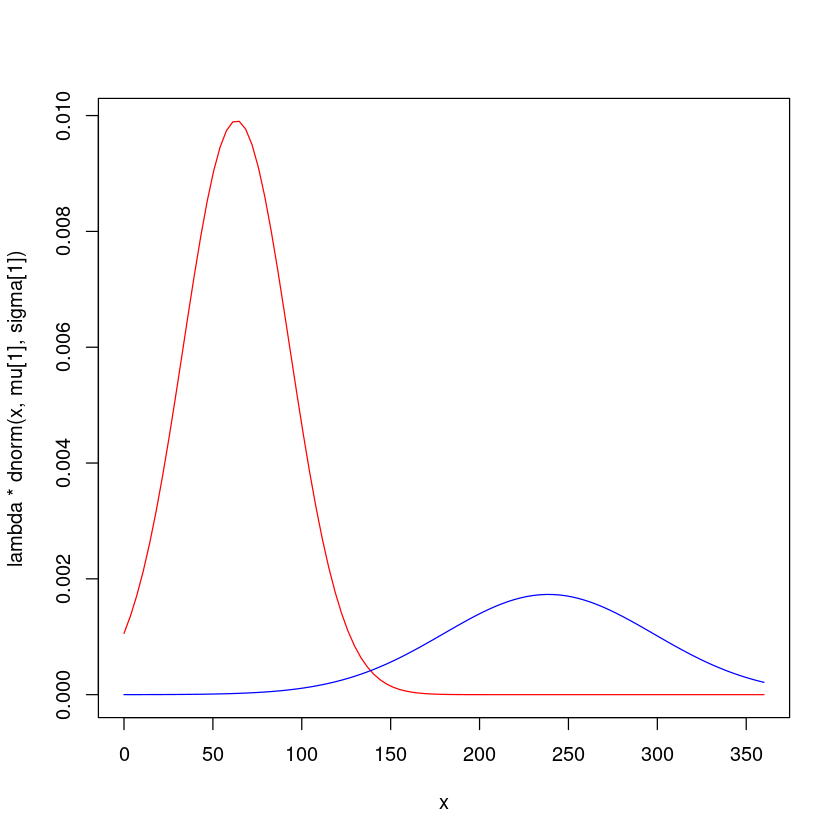

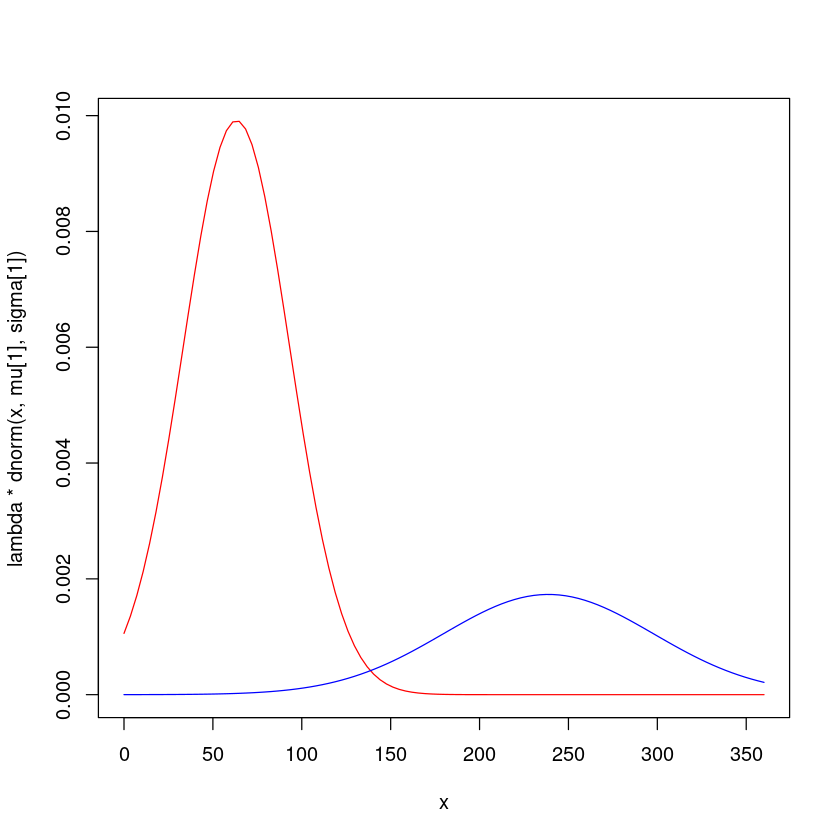

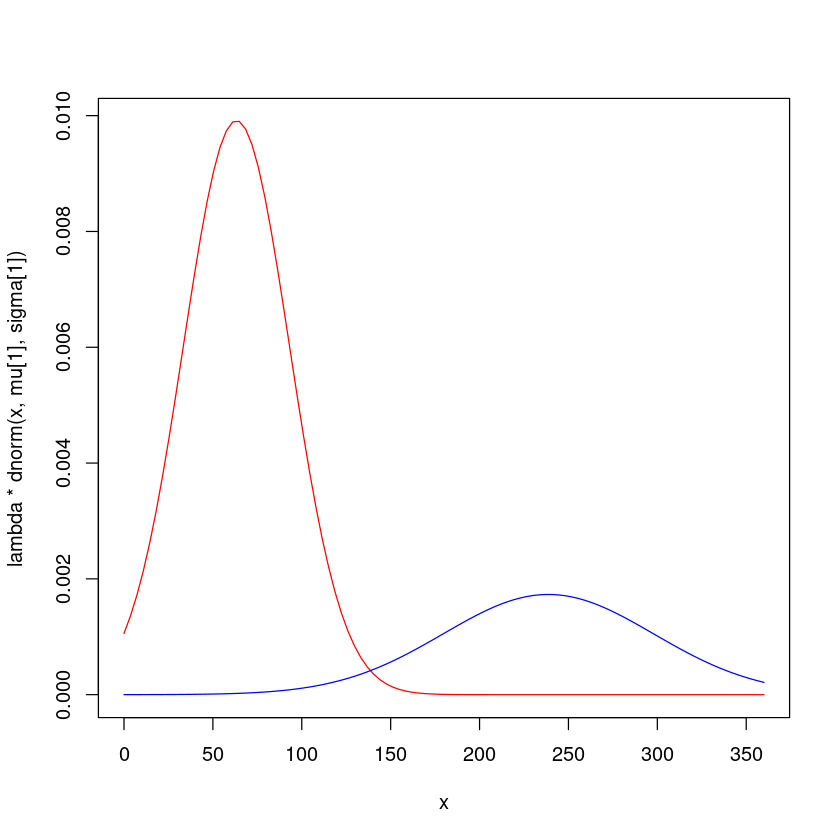

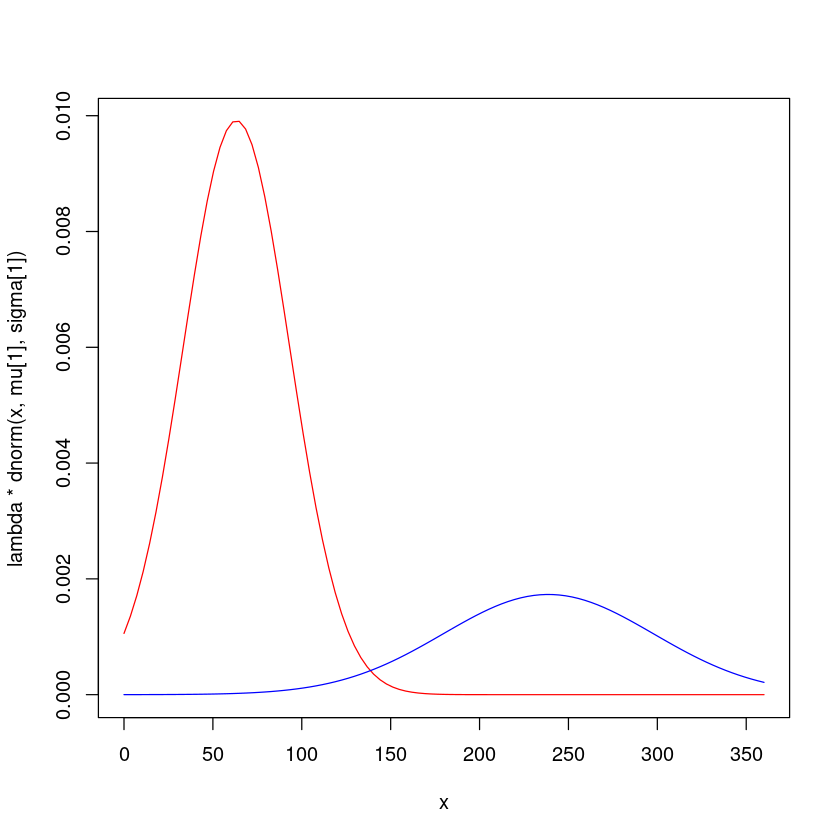

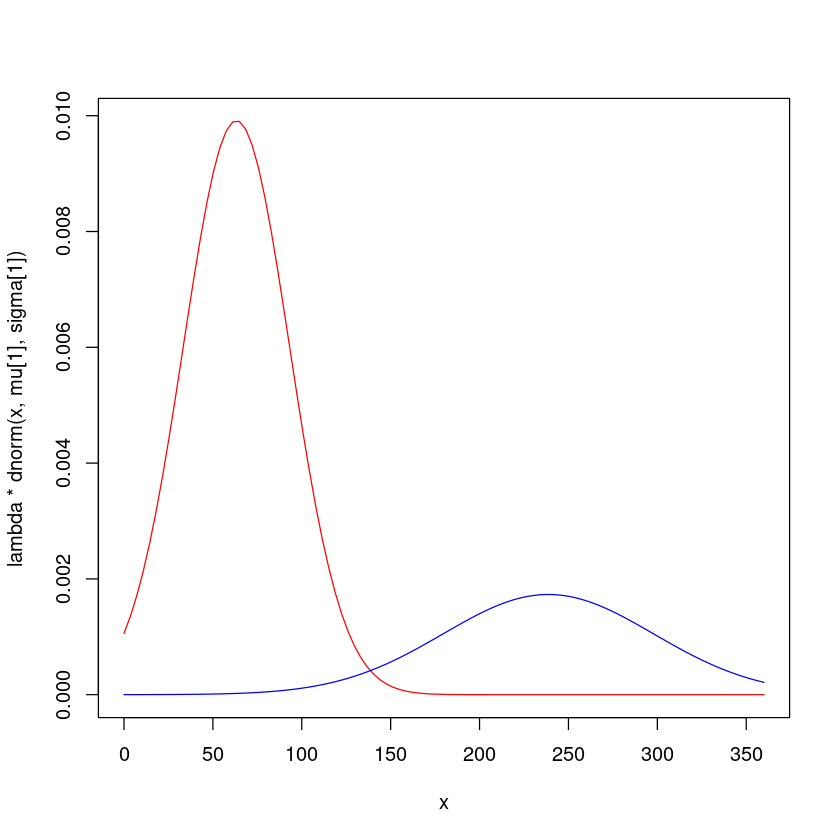

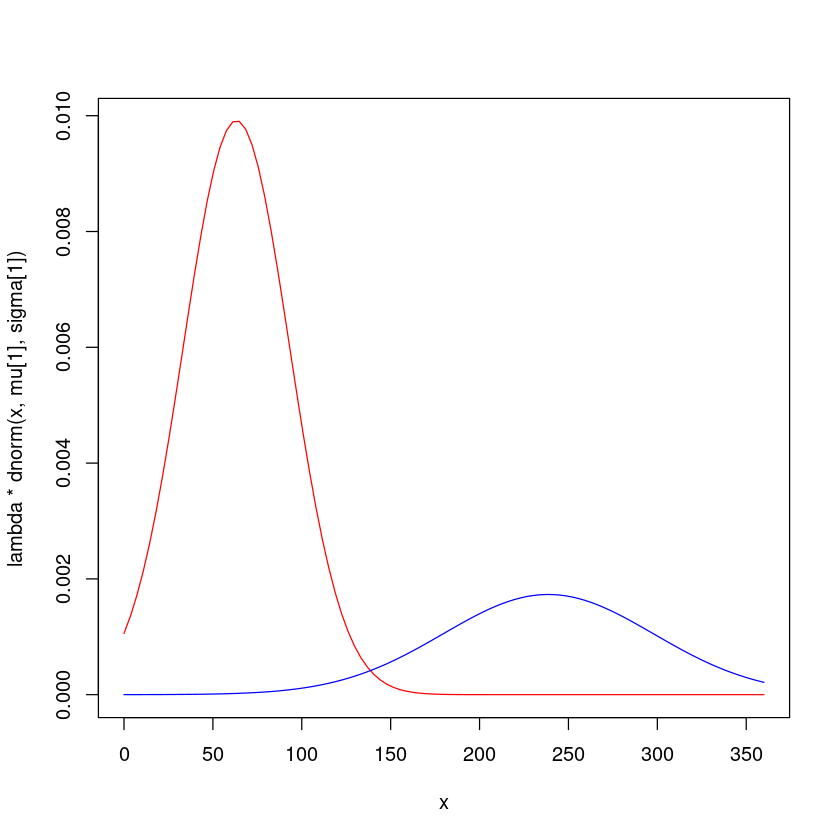

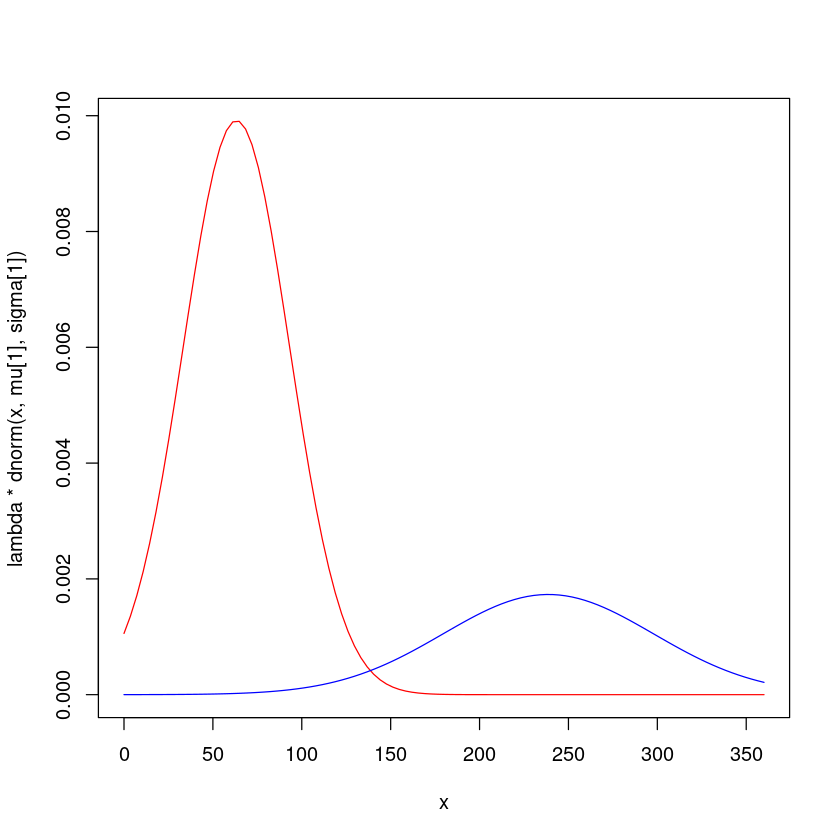

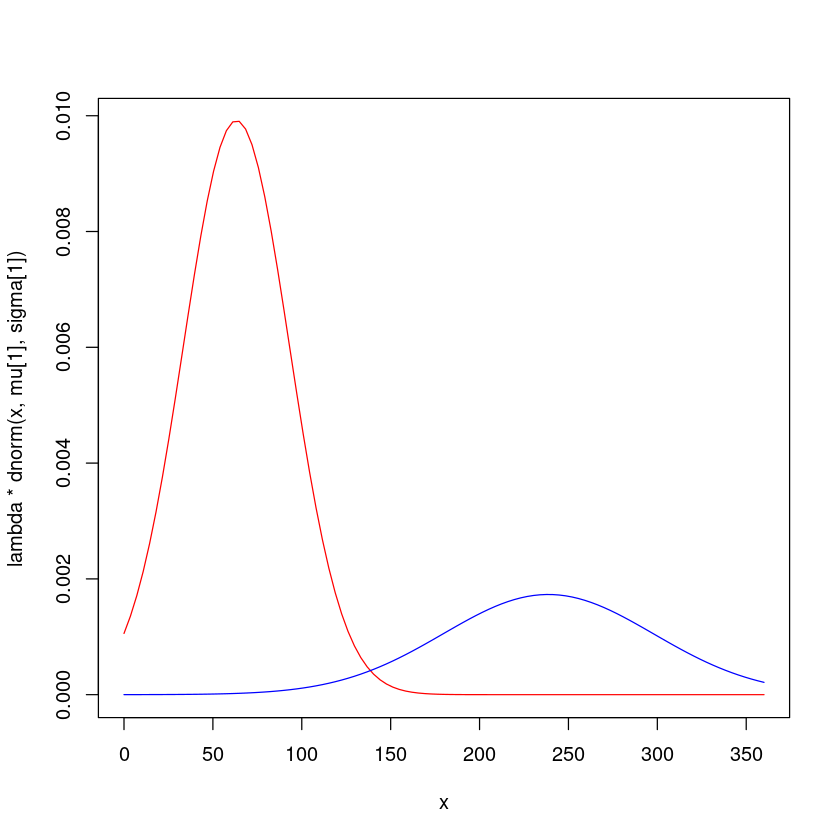

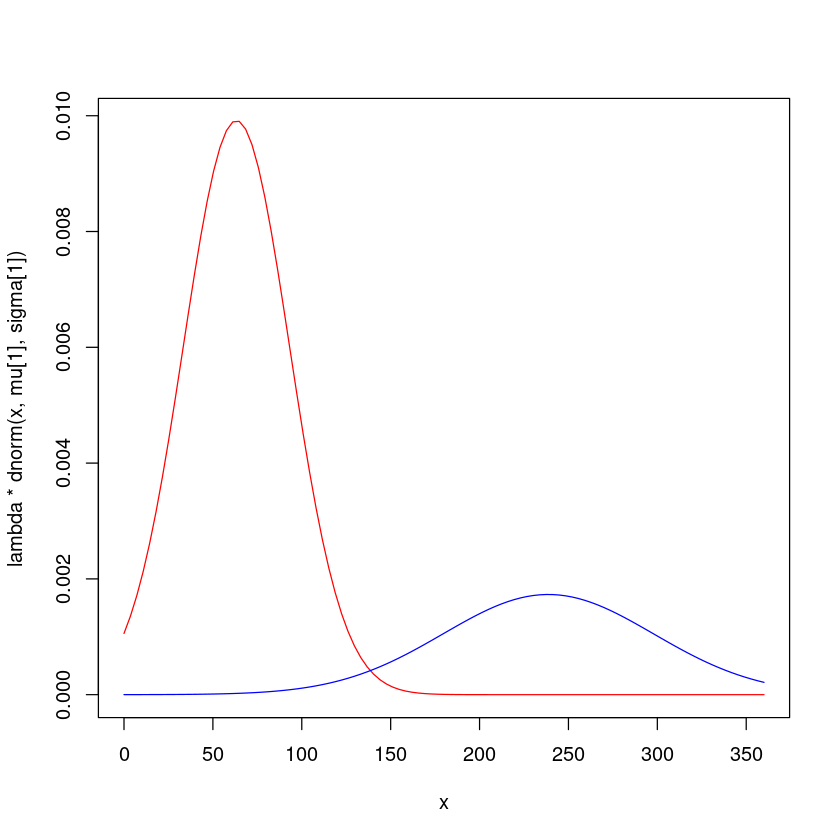

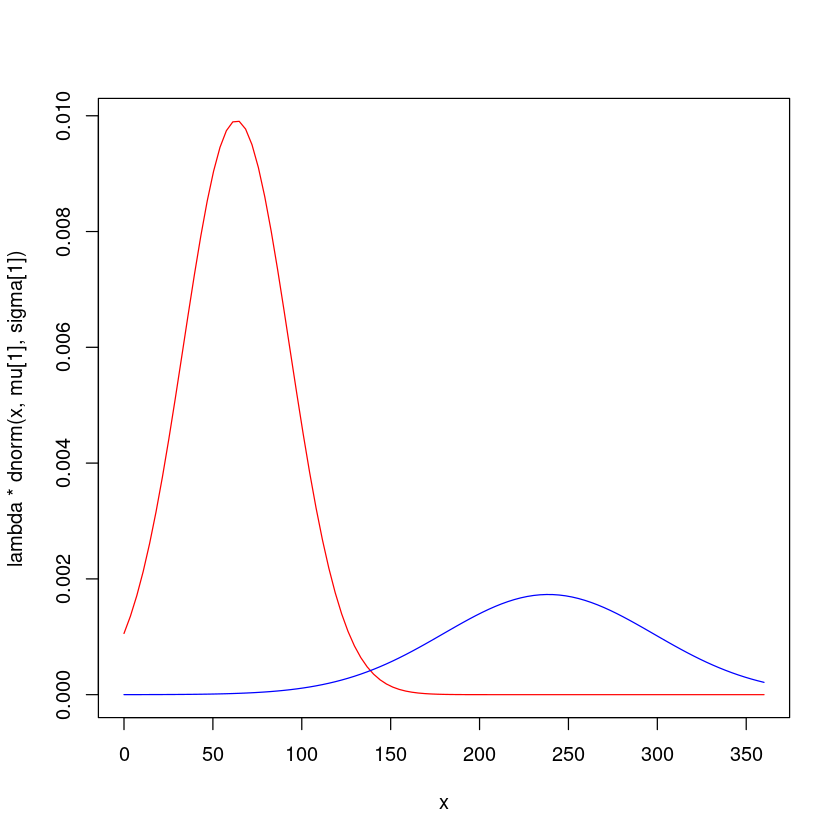

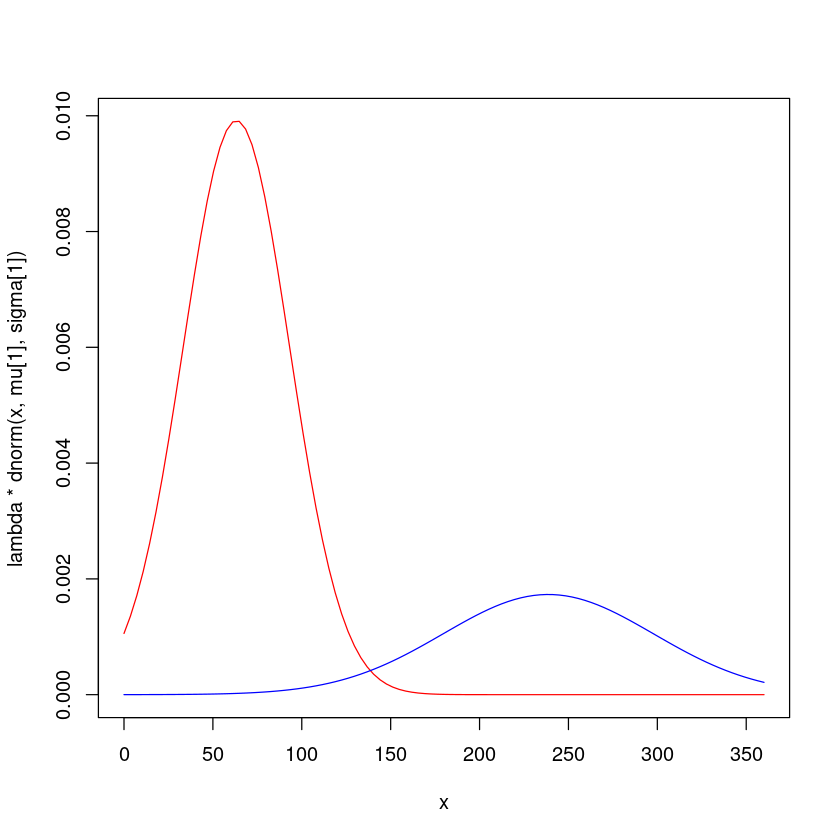

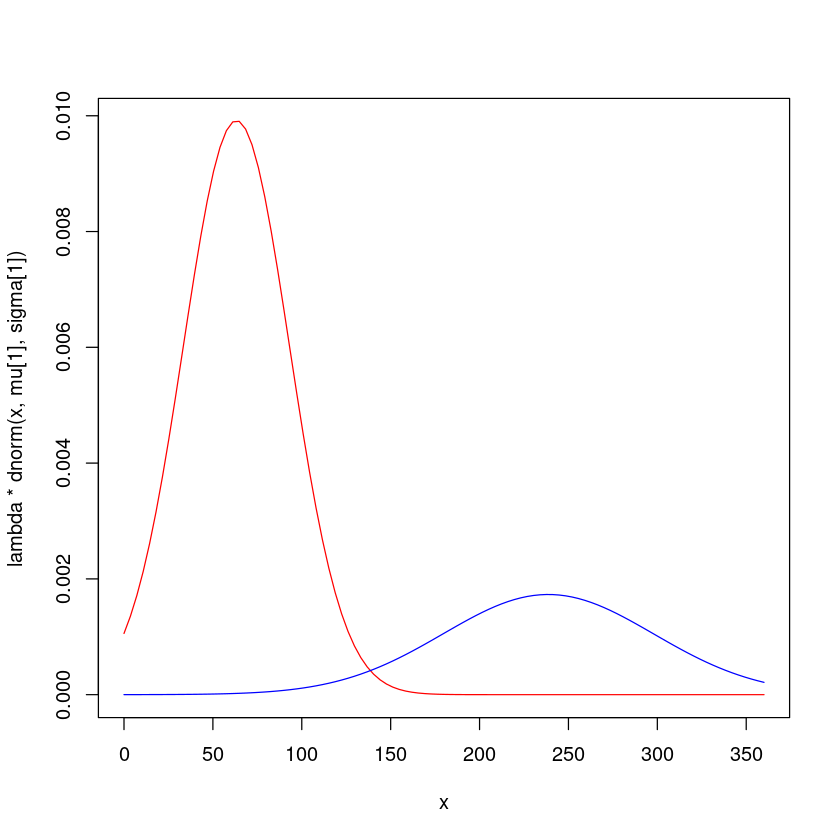

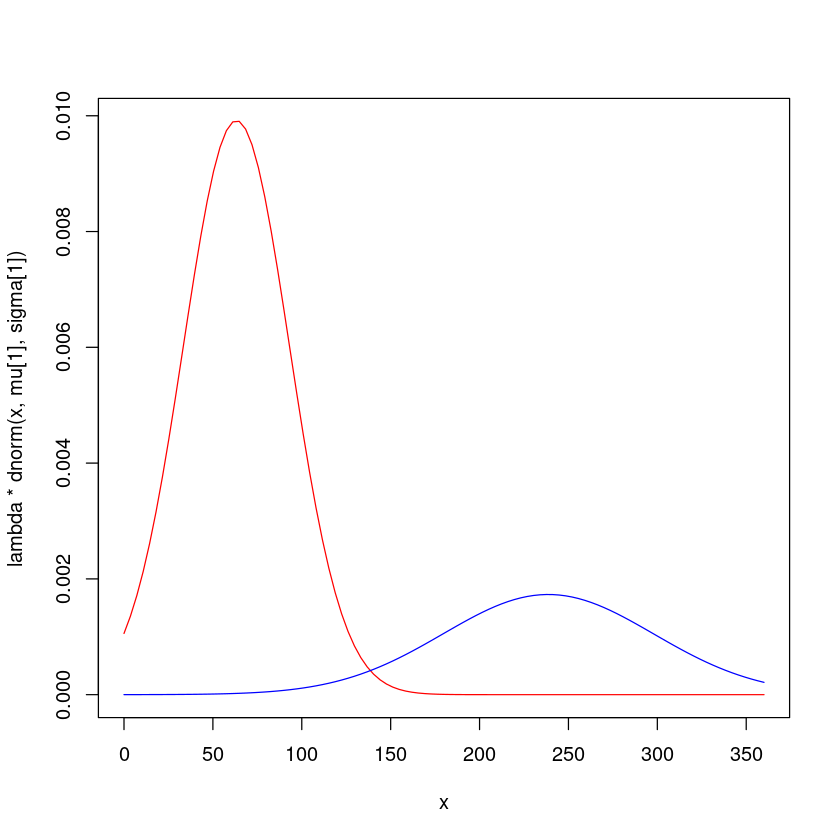

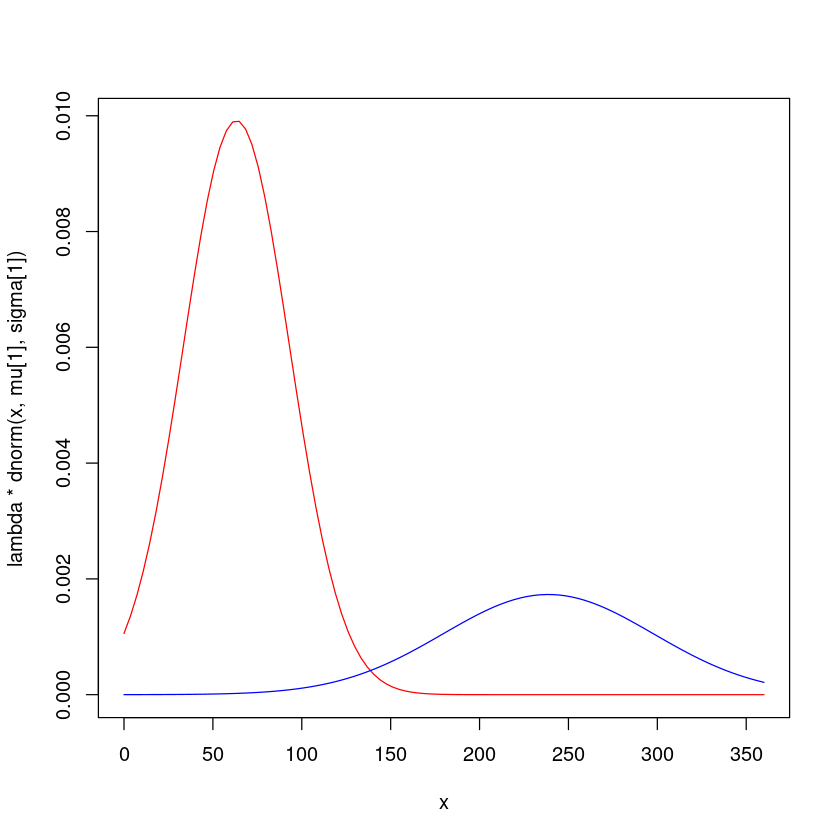

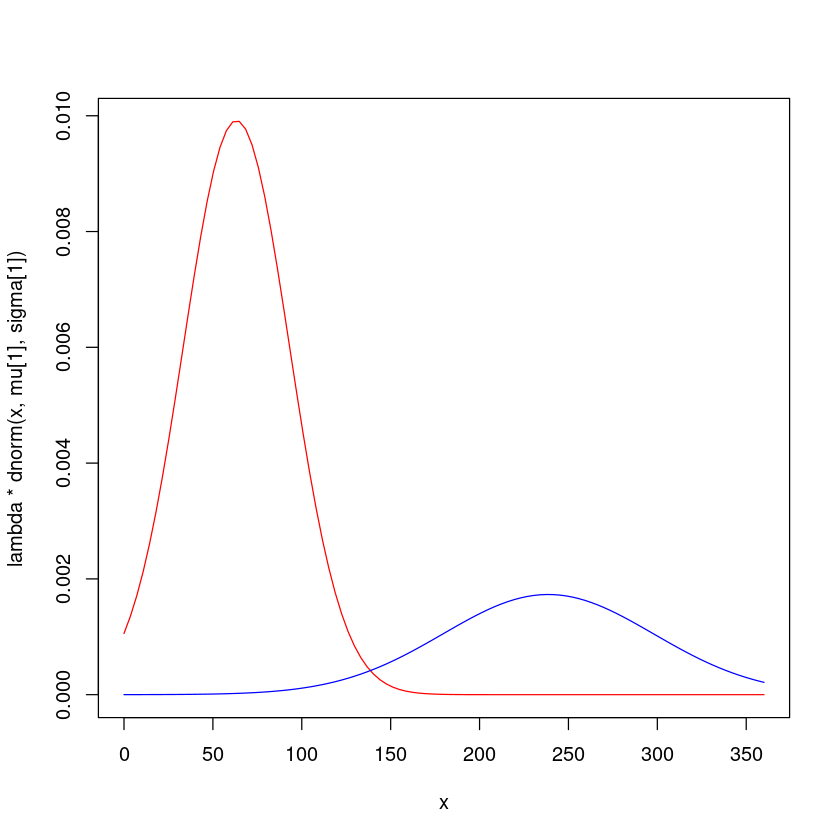

$lambda
[1] 0.7429515

$mu
[1]  63.23454 238.66604

$sigma
[1] 29.88692 59.26468

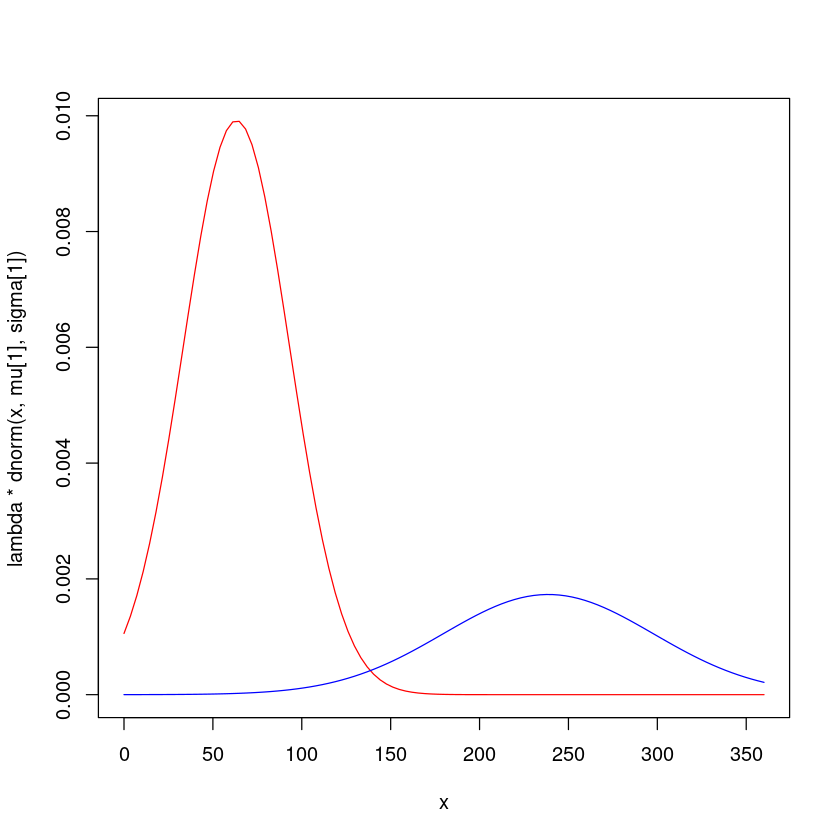

In [7]:
twoMix(turtles$Direction)

# Q3

In [8]:
require(mixtools)

Loading required package: mixtools

mixtools package, version 2.0.0.1, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




number of iterations= 31 
summary of normalmixEM object:
          comp 1     comp 2
lambda  0.742946   0.257054
mu     63.234039 238.663337
sigma  29.886445  59.266609
loglik at estimate:  -418.5738 


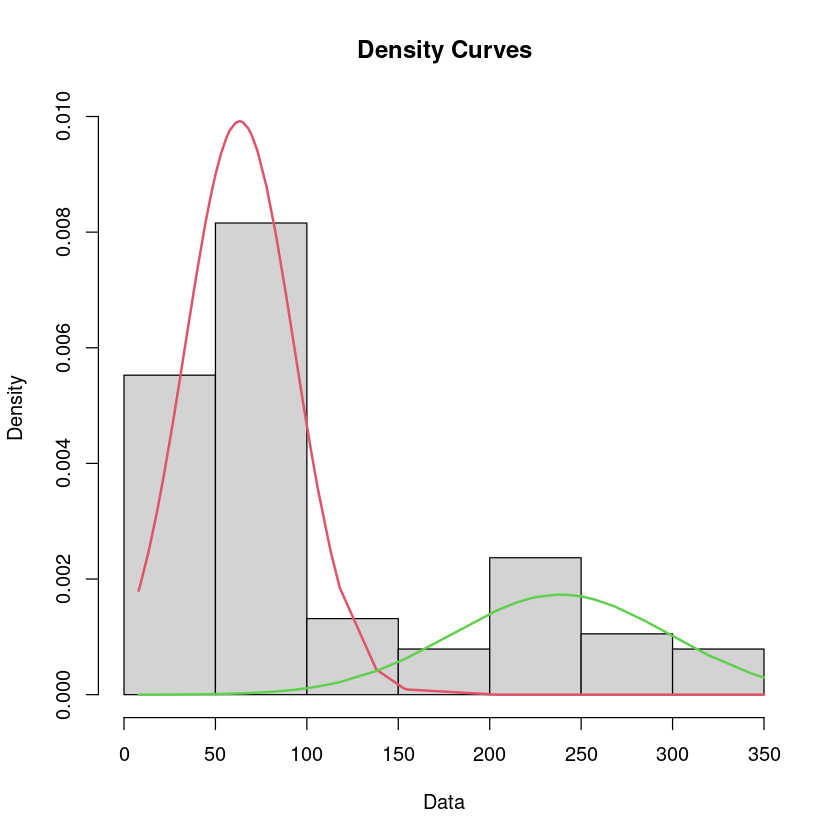

In [9]:
m.turtle = normalmixEM(turtles$Direction, k=2)
summary(m.turtle)
plot(m.turtle, whichplots = 2)

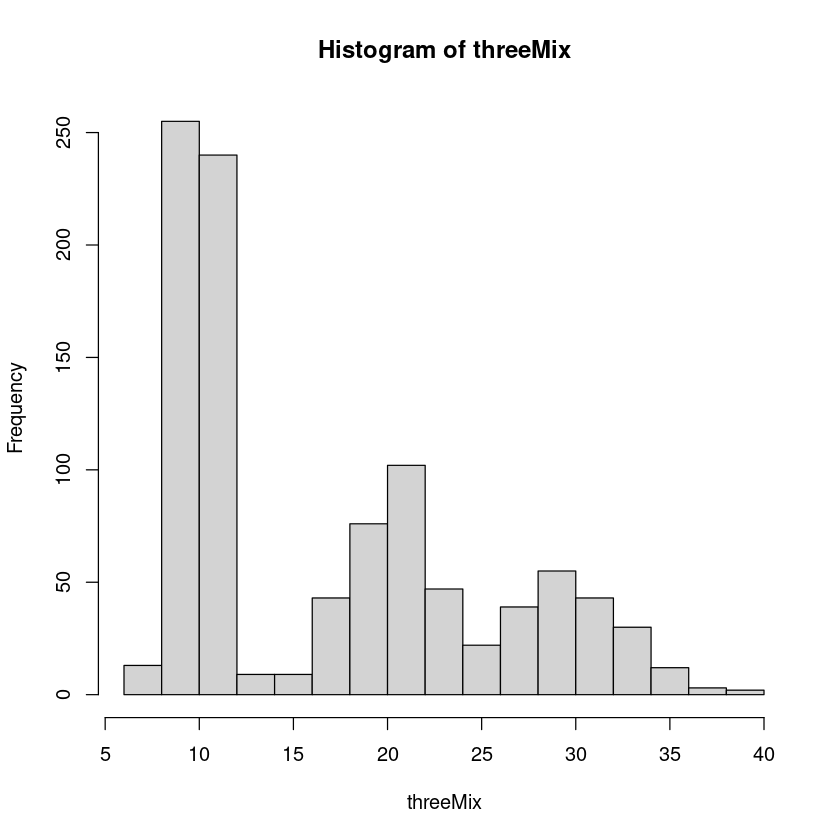

In [10]:
## Q4
threeMix = read.csv("ThreeMix.csv")$x
hist(threeMix, breaks=20)

In [27]:
m2 = normalmixEM(threeMix, k=2)
m2.precip = normalmixEM(precip, k=2)

number of iterations= 119 
number of iterations= 47 


In [11]:
m2 = normalmixEM(threeMix, k=2)
m3 = normalmixEM(threeMix, k=3)
m4 = normalmixEM(threeMix, k=4)

number of iterations= 12 
number of iterations= 74 
number of iterations= 574 


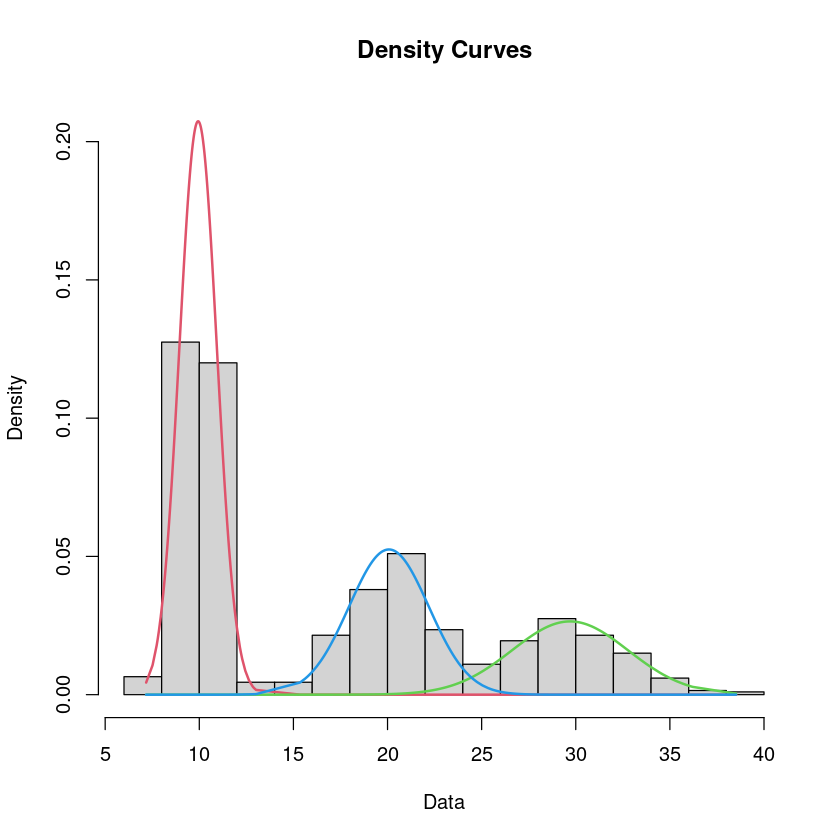

In [12]:
plot(m3, whichplots = 2, breaks=20)

In [13]:
aic = c(-2*m2$loglik + 2*(3*2-1),
        -2*m3$loglik + 2*(3*3-1),
        -2*m4$loglik + 2*(3*4-1))

In [14]:
print(aic)

[1] 5832.113 5692.394 5697.166


In [15]:
n = length(threeMix)

In [16]:
bic = c(-2*m2$loglik + log(n)*(3*2-1),
        -2*m3$loglik + log(n)*(3*3-1),
        -2*m4$loglik + log(n)*(3*4-1))

In [17]:
print(bic)

[1] 5856.651 5731.656 5751.151


# Q5

number of iterations= 46 
summary of normalmixEM object:
          comp 1    comp 2
lambda  0.673039  0.326961
mu     32.564489 39.663841
sigma  15.727480  4.827151
loglik at estimate:  -278.6498 


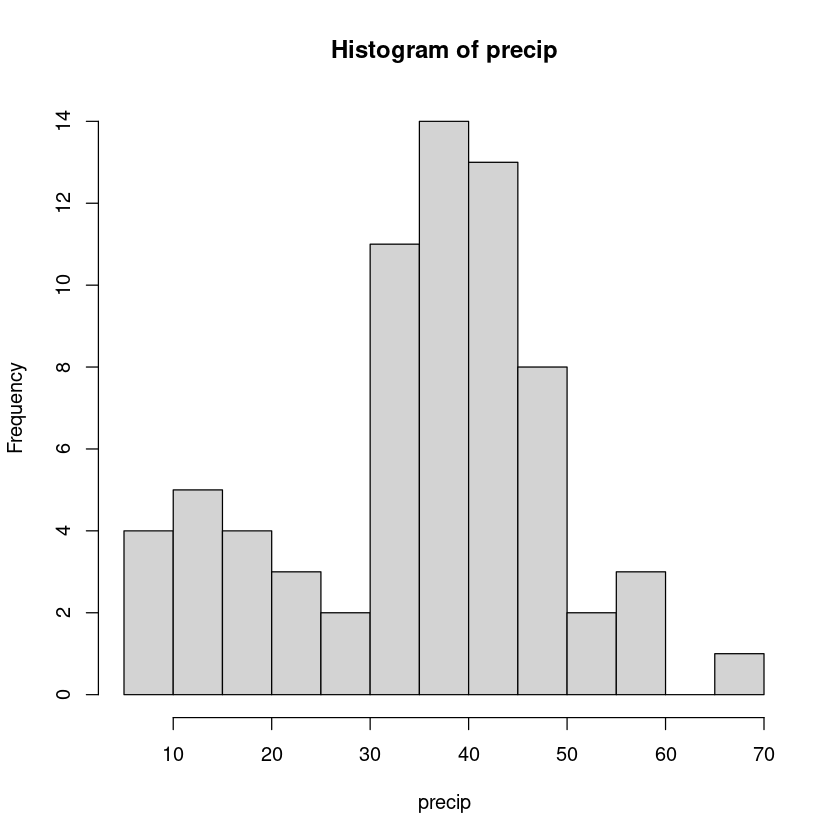

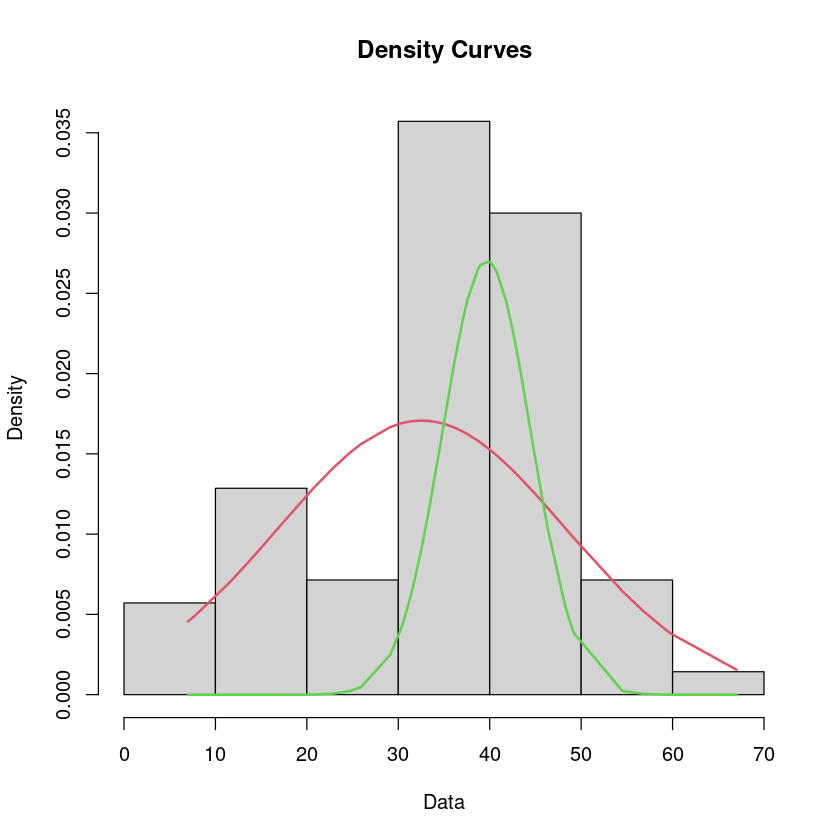

In [18]:
hist(precip, breaks=10)
m2.precip = normalmixEM(precip, k=2)
summary(m2.precip)
plot(m2.precip, whichplots=2)

# Q6

In [19]:
ll1 = sum(dnorm(precip, mean(precip), sd(precip), log=TRUE))

In [20]:
m3.precip = normalmixEM(precip, k=3)

number of iterations= 125 


In [21]:
aic = c(-2*ll1+2*2,
        -2*m2.precip$loglik+2*(3*2-1),
        -2*m3.precip$loglik+2*(3*3-1))

In [22]:
print(aic)

[1] 568.1548 567.2997 562.9684


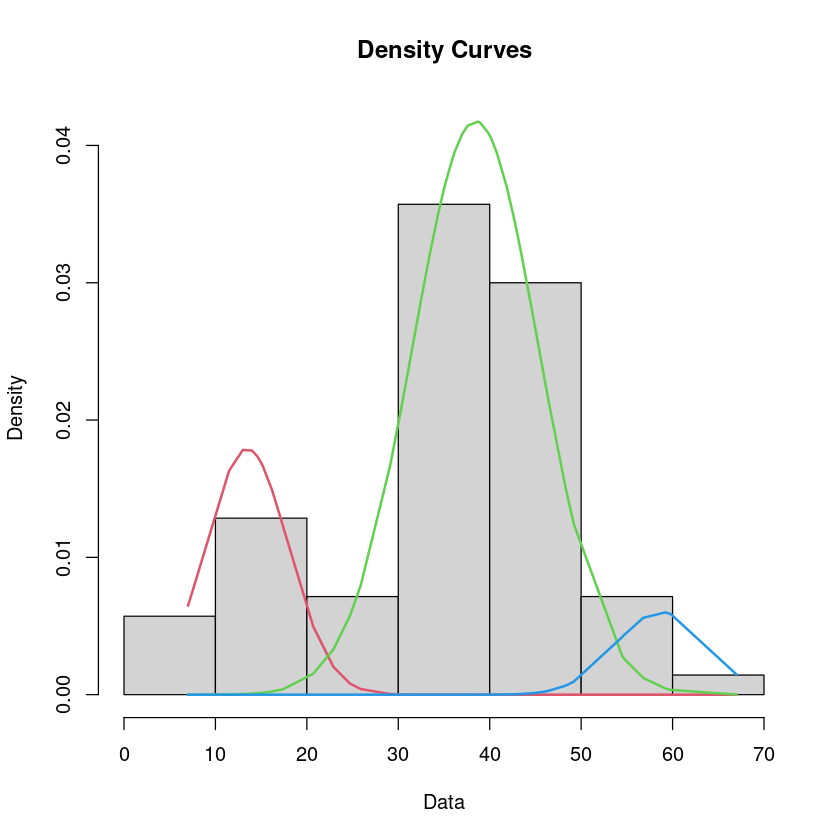

In [23]:
plot(m3.precip, whichplots = 2)

In [24]:
n = length(precip)

In [25]:
bic = c(-2*ll1+log(n)*2,
        -2*m2.precip$loglik+log(n)*(3*2-1),
        -2*m3.precip$loglik+log(n)*(3*3-1))

In [26]:
print(bic)

[1] 572.6517 578.5422 580.9564
